Загрузим библиотеки,считаем файл:

In [1]:
import  pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('stud_math.csv')
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
df.head(15)

Saving stud_math.csv to stud_math.csv


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Посмотрим на полученные данные внимательнее:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Есть переменные качественные и количественные. Кроме того, в данных есть пропуски (количество ненулевых значений различается. Для начала уберём те данные, для которых нет информации об оценке. Это наш главный показатель, и без него информация о ребёнке для насс не имеет большой ценности.

In [ ]:
df = df[df['score'].notna()]

Сразу разберёмся с выбросами в количественных шкалах:

In [4]:
def Outliers_fixer(data, col_name):#Обрабатываем выбросы, постаравшись максимально сохранить информацию о низких или высоких значениях у каждого школьника.
    IQR = data[col_name].quantile(q=0.75, interpolation='midpoint') - data[col_name].quantile(q=0.25, interpolation='midpoint')
    low = data[col_name].quantile(q=0.25, interpolation='midpoint') - 1.5*IQR
    high = data[col_name].quantile(q=0.75, interpolation='midpoint') + 1.5*IQR
    df.loc[df[col_name] > high, col_name] = high
    df.loc[df[col_name] < low, col_name] = low

In [5]:
Outliers_fixer(df, 'age')
Outliers_fixer(df, 'Medu')
Outliers_fixer(df, 'Fedu')
Outliers_fixer(df, 'traveltime')
Outliers_fixer(df, 'studytime')
#Outliers_fixer(df, 'failures')
Outliers_fixer(df, 'famrel')
Outliers_fixer(df, 'freetime')
Outliers_fixer(df, 'goout')
Outliers_fixer(df, 'health')
Outliers_fixer(df, 'absences')
Outliers_fixer(df, 'score')
#Вероятнее всего, это можно было сделать компактнее, однако у меня более сжатые варианты не заработали.

Теперь посмотрим внимательнее на номенативные переменные:

GP    344
MS     45
Name: school, dtype: int64

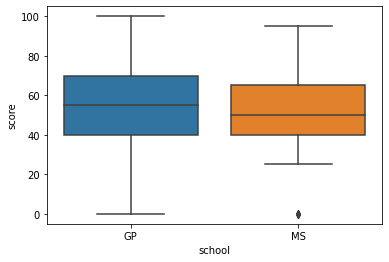

In [ ]:
display(df['school'].value_counts())#Т.к. пропущенных значений в столбце нет, посмотрим на его данные сразу:
sns.boxplot(x = 'school', y = 'score', data = df)

В данном случае бросается в глаза различный разброс в группах. Вероятнее всего, это связано с очень разным их размером. Очевидных различий нет, поэтому идею о влиянии шкалы на успехи учеников имеет смысл анализировать только при более глубоком поиске.

F    204
M    185
Name: sex, dtype: int64

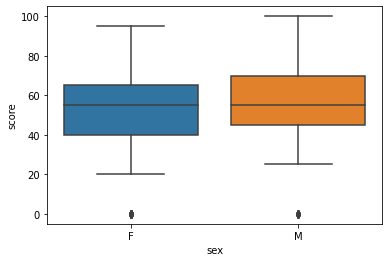

In [ ]:
display(df['sex'].value_counts())
sns.boxplot(x = 'sex', y = 'score', data = df)

Выглядит так, как будто у мальчиков оценки немного лучше. Это целесообразно проверить при дальнейше работе с данными.

Т.к. в следующих столбцах встречаются пропуски, попробуем это учитывать:

In [ ]:
df['address'].isnull().sum()

15

U    291
R     83
0     15
Name: address, dtype: int64

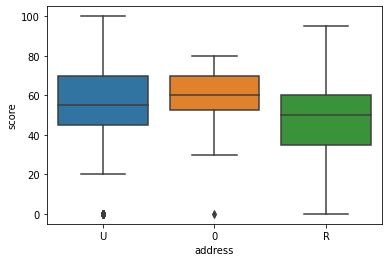

In [ ]:
#Довольно много пропусков. Сделаем их отдельным значением:
df['address'] = df['address'].fillna('unknown')
display(df['address'].value_counts())
sns.boxplot(x = 'address', y = 'score', data = df)

Пропущенне адреса выглядят очень средними. Для деревенских школ разброс выглядит больше, и там скорее всего чаще встречаются ученики с низкими оценками. Для уточнения этого в перспективе целесообразно провести статистический анализ.

In [ ]:
df['famsize'].isnull().sum()

27

GT3        255
LE3        107
unknown     27
Name: famsize, dtype: int64

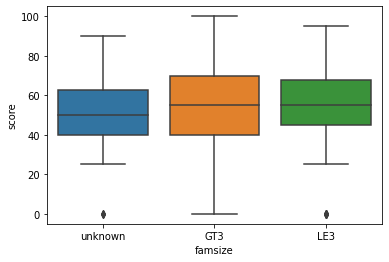

In [ ]:
#Пропусков довольно много. Попробуем их заменить:
df['famsize'] = df['famsize'].fillna('unknown')
display(df['famsize'].value_counts())
sns.boxplot(x = 'famsize', y = 'score', data = df)

Кажется, в больших семьях у детей более разнообразные результаты. Дети, для которых параметр неизвестен, ничем особенно не выделяются.

In [ ]:
df['Pstatus'].isnull().sum()

45

T          308
unknown     45
A           36
Name: Pstatus, dtype: int64

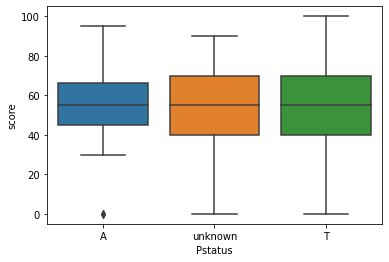

In [ ]:
df['Pstatus'] = df['Pstatus'].fillna('unknown')
display(df['Pstatus'].value_counts())
sns.boxplot(x = 'Pstatus', y = 'score', data = df)

Дети из полных семей кажутся более разнообразными (что может быть связано с размерами группы). Те, для кого положение родителей неизвестно, больше похожи на детей родителей, живущих совместо. При дальнейшем анализе их, вероятно, можно объединить.

In [ ]:
df['Mjob'].isnull().sum()

19

other       146
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

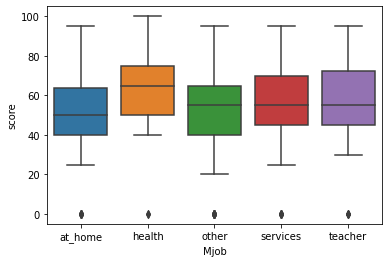

In [ ]:
#Пропусков многовато. У нас уже есть сборная группа other, добавим их в неё:
df['Mjob'] = df['Mjob'].fillna('other')
display(df['Mjob'].value_counts())
sns.boxplot(x = 'Mjob', y = 'score', data = df)

Кажется, дети матерей-медиков учатся немного лучше.

In [ ]:
df['Fjob'].isnull().sum()

36

other       230
services     99
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

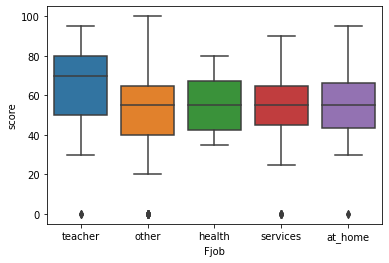

In [ ]:
#Тут тоже есть сборная группа, добавим пропуски в неё, как и в предыдущем случае:
df['Fjob'] = df['Fjob'].fillna('other')
display(df['Fjob'].value_counts())
sns.boxplot(x = 'Fjob', y = 'score', data = df)

Наибольший разброс в сборной группе (что вполне ожидаемо). А дети отцов-преподавателей, кажется, учатся лучше остальных.

In [ ]:
df['reason'].isnull().sum()

17

course        135
reputation    102
home          101
other          51
Name: reason, dtype: int64

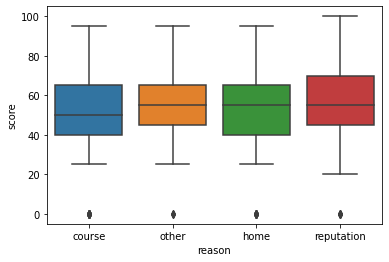

In [ ]:
df['reason'] = df['reason'].fillna('other')
display(df['reason'].value_counts())
sns.boxplot(x = 'reason', y = 'score', data = df)

Не похоже, чтобы причина для выбора школы влияла на успехи ученика. Удалим переменную.

In [ ]:
del df['reason']

In [ ]:
df['guardian'].isnull().sum()

31

mother    248
father     86
other      55
Name: guardian, dtype: int64

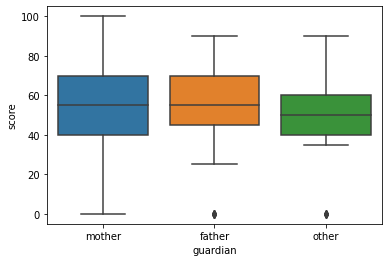

In [ ]:
df['guardian'] = df['guardian'].fillna('other')
display(df['guardian'].value_counts())
sns.boxplot(x = 'guardian', y = 'score', data = df)

Группа под опекой матерей самая большая и там самый большой разброс (что вполне ожидаемо). Не похоже, чтобы опекун существенно влиял на успех в учёбе.

In [ ]:
del df['guardian']

In [ ]:
df['schoolsup'].isnull().sum()

9

no     331
yes     49
Name: schoolsup, dtype: int64

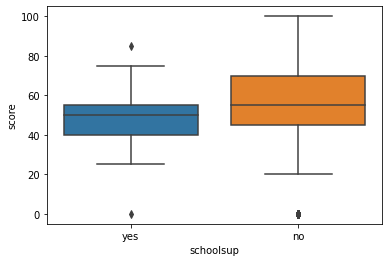

In [ ]:
#Пропусков относительно немного, не будем их включать, чтобы данные остались более чистыми:
display(df['schoolsup'].value_counts())
sns.boxplot(x = 'schoolsup', y = 'score', data = df)

Дети с поддержкой судя по всему имеют несколько более низкие оценки. Возможно, её наличие - маркер проблем с учёбой.

In [ ]:
df['famsup'].isnull().sum()

38

yes        216
no         135
unknown     38
Name: famsup, dtype: int64

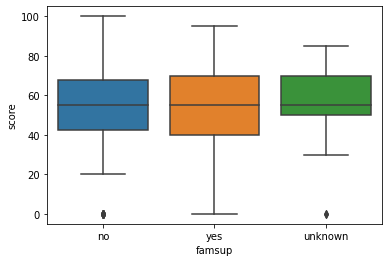

In [ ]:
#Пропусков так много, что наберётся целая группа. Посмотрим, на кого они больше похожи:
df['famsup'] = df['famsup'].fillna('unknown')
display(df['famsup'].value_counts())
sns.boxplot(x = 'famsup', y = 'score', data = df)

Не похоже, что есть различия между группами (хотя в дальнейшем анализе целесообразно проверить это). Группа с поддержкой имеет больший разброс (особенно среди низких значений) - возможно, родители неуспевающих учеников стремятся уделять им больше внимания.

In [ ]:
df['paid'].isnull().sum()

39

no         197
yes        153
unknown     39
Name: paid, dtype: int64

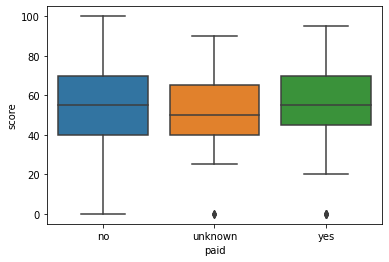

In [ ]:
df['paid'] = df['paid'].fillna('unknown')
display(df['paid'].value_counts())
sns.boxplot(x = 'paid', y = 'score', data = df)

Результат выглядит так, как будто планые занятия бесполезны. Возможно, это так. С другой стороны, может быть нелинейная связь: такие уроки посещают дети отнсительно благополучных семей (родители имеют возможность и желание тратить деньги на образование ребёнка) в том случае, если имеют проблемы с математикой. В группе без платных занятий оказываются и те, кто успешно справляется с курсом (высокие оценки) и те, чьи родители не могут или не считают нужным подтягивать их низкие оценки по математике.
В любом случае, прямой связи между занятиями и оценкой скорее всего нет.

In [ ]:
df['activities'].isnull().sum()

14

yes        192
no         183
unknown     14
Name: activities, dtype: int64

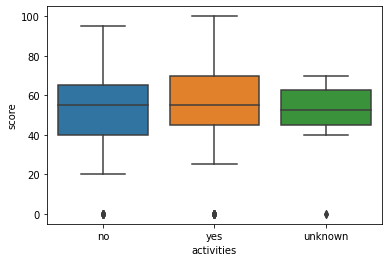

In [ ]:
df['activities'] = df['activities'].fillna('unknown')
display(df['activities'].value_counts())
sns.boxplot(x = 'activities', y = 'score', data = df)

Явной связи не выделяется.

In [13]:
del df['activities']

In [ ]:
df['nursery'].isnull().sum()

15

yes        297
no          77
unknown     15
Name: nursery, dtype: int64

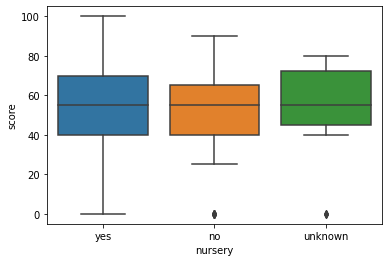

In [ ]:
df['nursery'] = df['nursery'].fillna('unknown')
display(df['nursery'].value_counts())
sns.boxplot(x = 'nursery', y = 'score', data = df)

Ожидаемо высокий разброс в большой группе по сравнению с маленькими. Явных различий не видно, переменная явно не первый кандидат в дальнейший анализ.

In [14]:
del df['nursery']

In [ ]:
df['higher'].isnull().sum()

20

yes        350
unknown     20
no          19
Name: higher, dtype: int64

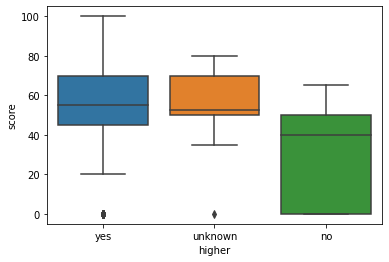

In [ ]:
df['higher'] = df['higher'].fillna('unknown')
display(df['higher'].value_counts())
sns.boxplot(x = 'higher', y = 'score', data = df)

Те, про чьи дальнейшие образовательные планы мы не знаем, выглядят похожими на планирующих высшее образование (что не удивительно - таких в наших данных большинство). А вот в группе без таких планов явно чаще встречаются низкие оценки по математике. Вероятно, влияние есть: дети либо считают свои шансы на образование низкими, либо не заинтересованы в нём и не стараются учиться.

In [ ]:
df['internet'].isnull().sum()

34

yes        300
no          55
unknown     34
Name: internet, dtype: int64

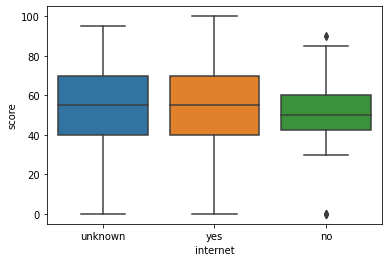

In [ ]:
df['internet'] = df['internet'].fillna('unknown')
display(df['internet'].value_counts())
sns.boxplot(x = 'internet', y = 'score', data = df)

Не похоже, чтобы было большое влияние интеренета на успехи в учёбе. Группа с неизвестным параметром похожа на тех, у кого интернет есть. Статистическую существенность различий между пользователями интернета и детьми без него в дальнейшем анализе имеет смысл проверить на статистическую достоверность.

In [ ]:
df['romantic'].isnull().sum()

31

no         235
yes        123
unknown     31
Name: romantic, dtype: int64

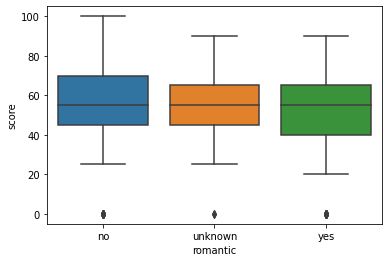

In [ ]:
df['romantic'] = df['romantic'].fillna('unknown')
display(df['romantic'].value_counts())
sns.boxplot(x = 'romantic', y = 'score', data = df)

Не похоже, что есть большие различия между группами,хотя среди тех, тко не состоит в отношениях чаще встречаются более высокие оценки.

Подводя итог анализу качественных переменных, можно выделить наиболее вероятные предикторы успеха ученика:
- в первую очередь планы на получение высшего образования
- професси матери и отца: дети матерей, работающих в сфере здравоохранения, и отцов-педагогов кажутся более успешными
За рамками предварительного анализа при более детальном изучении данных целесообразно начать с проверки статистической значимости этих различий.

Теперь обратимся к количественным данным. В них также есть пропуски. Их можно заменить, например, средними, однако для большей чистоты корреляционного анализа я предпочту оставить их как есть.

In [ ]:
df_mean = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']].mean()
df_std = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']].std()
df_stat = pd.DataFrame([df_mean, df_std]).T
df_stat.columns = ['mean', 'std']
df_stat

,mean,std
age,16.670951,1.255793
Medu,2.760925,1.085003
Fedu,2.532877,1.084488
traveltime,1.425208,0.659294
studytime,2.001309,0.771455
failures,0.000000,0.000000
famrel,3.993094,0.772148
freetime,3.247368,0.944708
goout,3.094241,1.116104
health,3.529412,1.402006


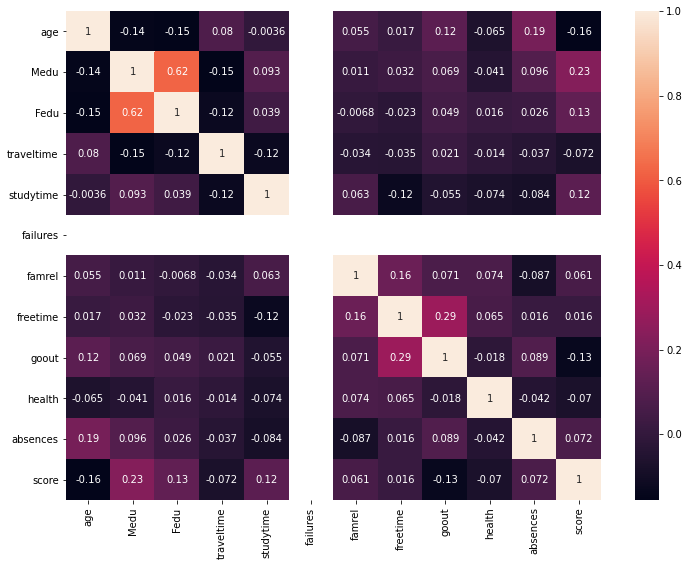

In [ ]:
correlation = df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health', 'absences', 'score']].corr()
plt.figure(figsize=(12, 9))
sns.heatmap(correlation, annot = True)

Похоже, уровень образования матери и отца сильно связан. Оставим только уровень образования матери (он сильнее коррелирует с оценкой ребёнка) чтобы не дублировать данные.
С оценкой практически не связаны (коэффициент корреляции в районе нуля) время в пути до школы, отношения в семье, состояние здоровья и (как ни удивительно) кличество пропущенных занятий.
Эти данные тоже можно удалить (возможно, часть из них имеет нелинейную связь, и в заивисимости от результатов анализа к ним придётся вернуться, поэтому перед удалением целесообразно посмотреть на то, как эта связь выглядит).

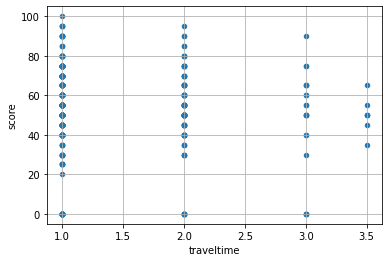

In [ ]:
df.plot(x = 'traveltime', 
        y = 'score', 
        kind = 'scatter', 
        grid = True)

Кажется, связи и правда нет. Переменную можно удалять.

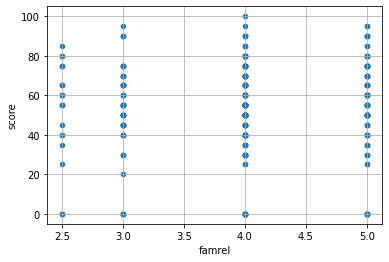

In [ ]:
df.plot(x = 'famrel', 
        y = 'score', 
        kind = 'scatter', 
        grid = True)

Не похоже, что мы пропустили какую-то хитрую нелинейную зависимость.

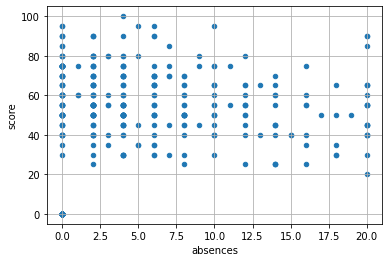

In [6]:
df.plot(x = 'absences', 
        y = 'score', 
        kind = 'scatter', 
        grid = True)

Здесь мы также не видим неожиданной нелинейной связи.

In [ ]:
del df['Fedu']
del df['traveltime']
del df['famrel']
del df['absences']

Количество неудач, по всей видимости, стало жертвой удаления выбросов (большинство значений равно нулю, в связи с чем другие показатели отказались отмеченными, как выбросы). Вернёмся назад и остановим эту ошибку.

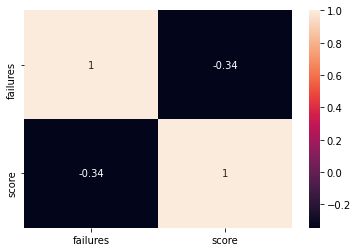

In [ ]:
correlation = df[['failures', 'score']].corr()
sns.heatmap(correlation, annot = True)

Связь сильнее, чем с любым другим показателем из наших данных. Связь отрицательная, т.е. чем меньше неудач - тем выше оценка. Посмотрим на распределение этой переменной:

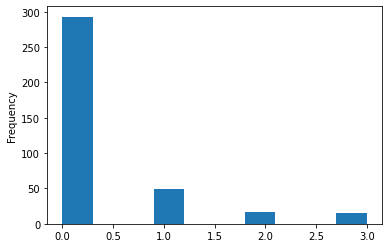

In [ ]:
df['failures'].plot(kind = 'hist')

Как и ожидалось, большинство значений равно нулю. Посмотрим, как выглядит связь неудач с оценкой:

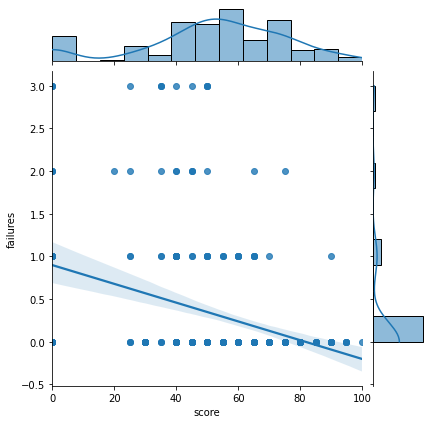

In [7]:
sns.jointplot(x = 'score', y = 'failures', data = df, kind = 'reg')

Да, кажется, что чем больше неудач, тем ниже оценка по математике. На всякий случай взглянем на этот вопрос под другим углом:

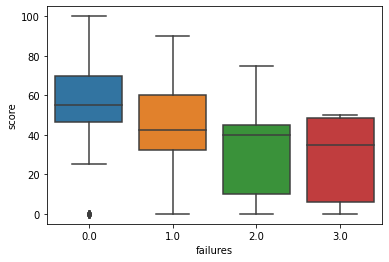

In [8]:
sns.boxplot(x = 'failures', y = 'score', data = df)

Да, так связь выглядит более наглядно.

Ещё одна относительно связанная с оценкой переменная - уровень образования матери. Рассмотрим теперь её:

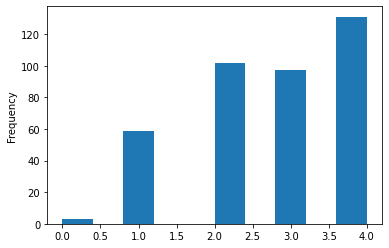

In [9]:
df['Medu'].plot(kind = 'hist')

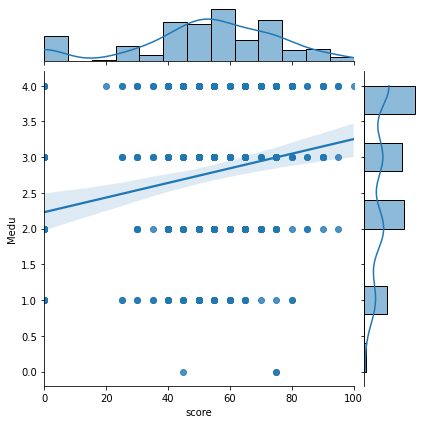

In [10]:
sns.jointplot(x = 'score', y = 'Medu', data = df, kind = 'reg')

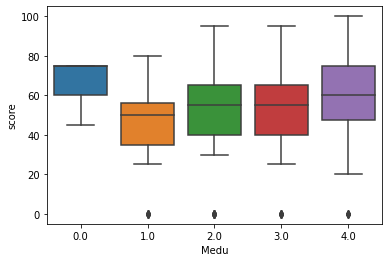

In [11]:
sns.boxplot(x = 'Medu', y = 'score', data = df)

Похоже, наиболее образованные матери чаще имеют детей с высокими оценками.

Можно сделать следующие выводы:
- наиболее тесно связаны с оценками по математике планы на высшее образование, а также профессии родителей
- большую связь с оценкой имеет количество неудач: два или три провала существенно снижают полученный балл
- относительно связан с оценкой уровень образования матери (высшее обращование повышает шансы ребёнка на высокий балл).

В дальнейшем целесообразно начать анализ с этих переменных. Переменные, наименее вероятно имеющие значение, удалены.

Дальнейший анализ целесообразно начать с поиска статистически достоверных различий между группами (выделенными на основании номенативных переменных). Кроме того, образование матери также может рассматриваться как номенативная переменная, т.к. содержит небольшое число рангов.